In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
gifted=pd.read_csv('gifted.csv')
gifted.head()

score  fatheriq  motheriq  speak  count  read  edutv  cartoons
0    159       115       117     18     26   1.9   3.00      2.00
1    164       117       113     20     37   2.5   1.75      3.25
2    154       115       118     20     32   2.2   2.75      2.50
3    157       113       131     12     24   1.7   2.75      2.25
4    156       110       109     17     34   2.2   2.25      2.50

In [3]:
gifted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   score     36 non-null     int64  
 1   fatheriq  36 non-null     int64  
 2   motheriq  36 non-null     int64  
 3   speak     36 non-null     int64  
 4   count     36 non-null     int64  
 5   read      36 non-null     float64
 6   edutv     36 non-null     float64
 7   cartoons  36 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 2.4 KB


#### The data is too less but there is no null values present. Let's check for some basic descriptive stats.

In [4]:
gifted.describe()

score    fatheriq    motheriq      speak      count       read  \
count   36.000000   36.000000   36.000000  36.000000  36.000000  36.000000   
mean   159.138889  114.777778  118.166667  18.000000  30.694444   2.136111   
std      4.630043    3.481470    6.504943   3.224903   4.314887   0.205847   
min    150.000000  110.000000  101.000000  10.000000  21.000000   1.700000   
25%    155.000000  112.000000  113.750000  17.000000  28.000000   2.000000   
50%    159.000000  115.000000  118.000000  18.000000  31.000000   2.200000   
75%    162.000000  116.250000  122.250000  20.000000  34.250000   2.300000   
max    169.000000  126.000000  131.000000  23.000000  39.000000   2.500000   

           edutv   cartoons  
count  36.000000  36.000000  
mean    1.958333   3.062500  
std     0.559017   0.627851  
min     0.750000   1.750000  
25%     1.750000   2.687500  
50%     2.000000   3.000000  
75%     2.250000   3.500000  
max     3.000000   4.500000

#### The minimum IQ of a gifted child in the data is 150 with an average of around 160.

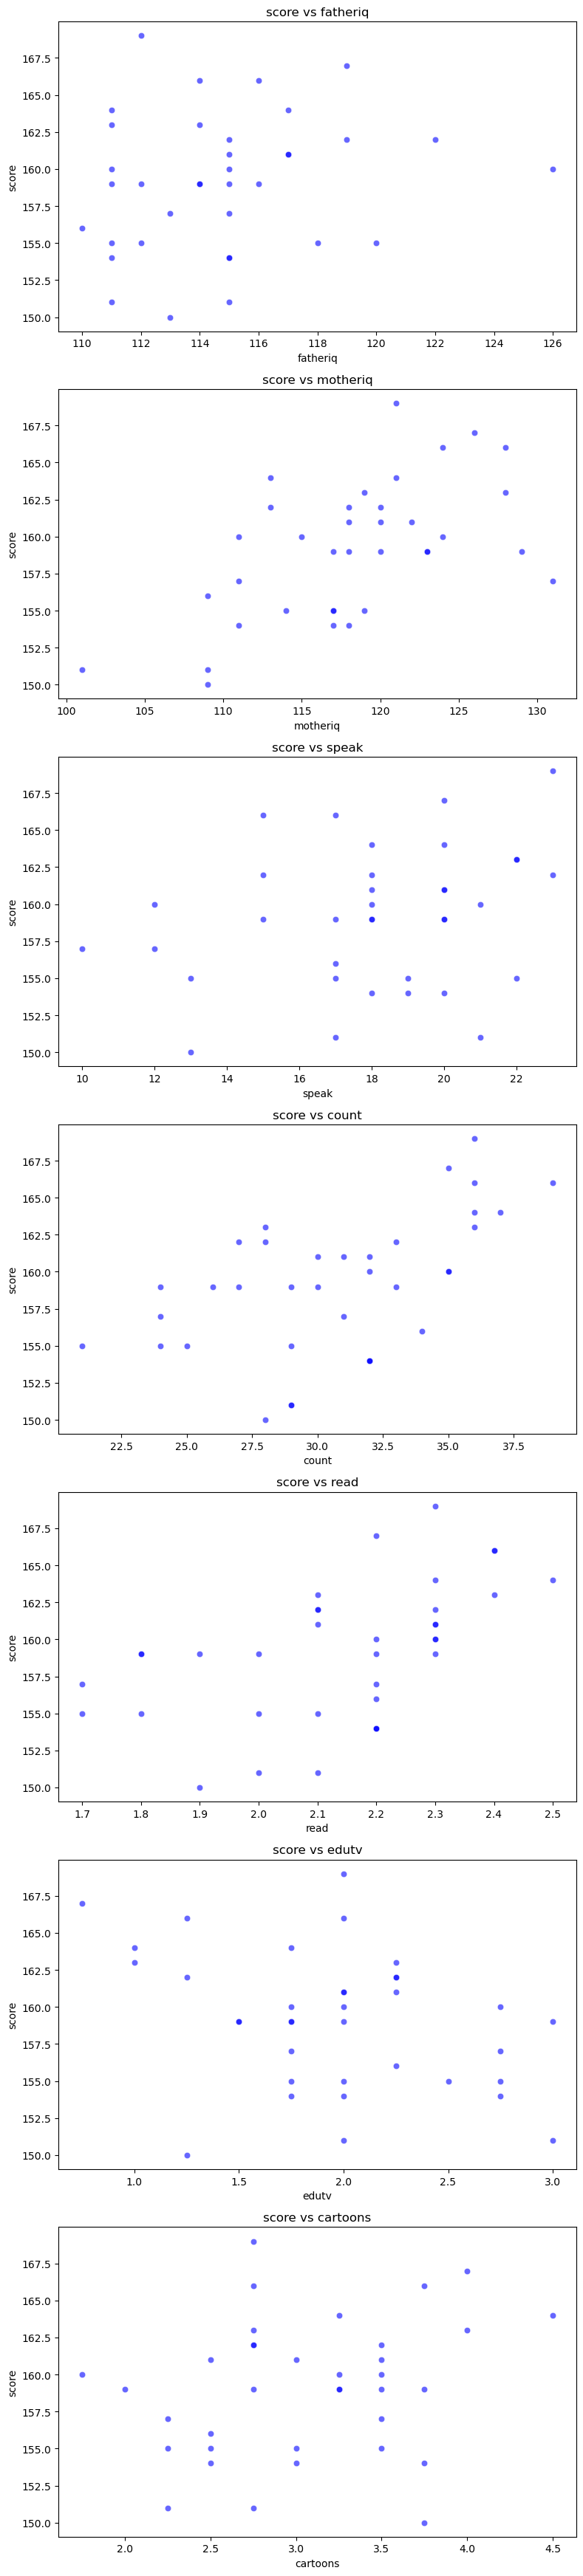

In [5]:
target_var = 'score'
independent_vars = [col for col in gifted.columns if col != target_var]
fig, axes = plt.subplots(len(independent_vars), 1, figsize=(8, len(independent_vars) * 5), sharex=False)
for i, var in enumerate(independent_vars):
    sns.scatterplot(x=var, y=target_var, data=gifted, ax=axes[i], color='blue', alpha=0.6)
    axes[i].set_title(f'{target_var} vs {var}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target_var)
plt.tight_layout()
plt.show()

#### From the first look -
- #### Mother's IQ seems to contribute more to the child's IQ than the father.
- #### There isn't quite evidence that shows that children's with more IQ tend to speak and count quick from early days.
- #### There is a clear trend of having good IQ scores as much as the parents reads to their childrens.
- #### Excessive watching of educational programmes seems to have a decrease in the child's IQ.
- #### Watching too much cartoons neither help develop that much increase nor decrease in children's IQ and to some extent this applies for educational programmes too.

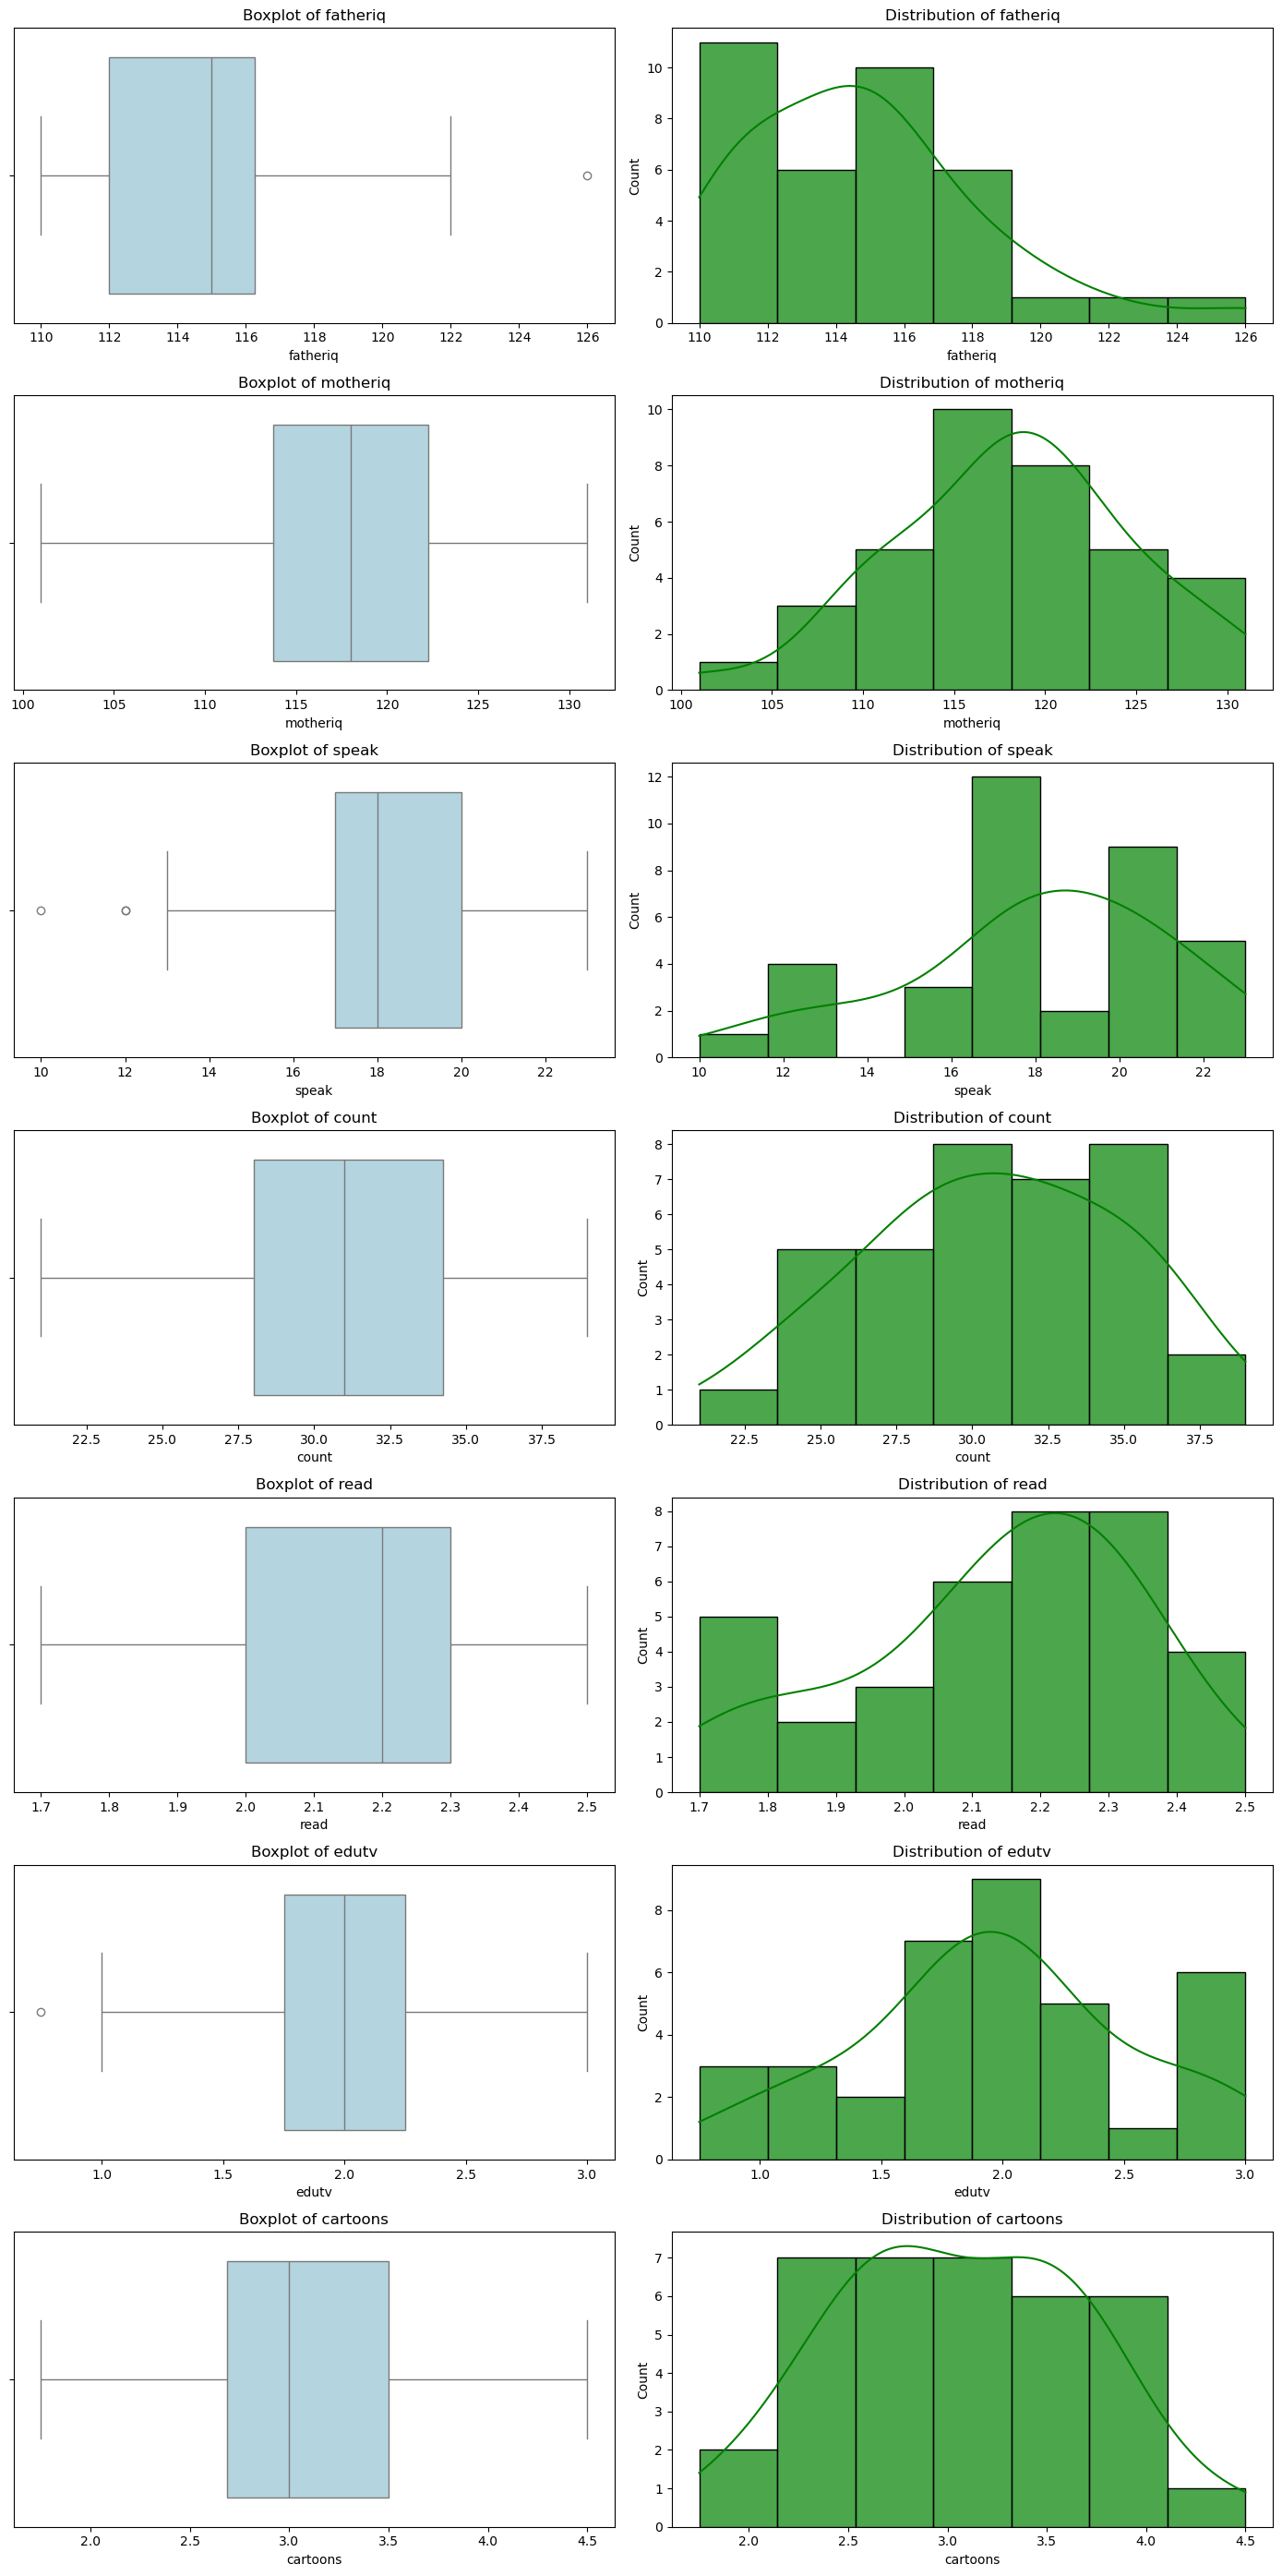

In [6]:
independent_vars = [col for col in gifted.columns if col != target_var]
fig, axes = plt.subplots(len(independent_vars), 2, figsize=(14, len(independent_vars) * 4))
for i, var in enumerate(independent_vars):
    sns.boxplot(data=gifted, x=var, ax=axes[i, 0], color='lightblue')
    axes[i, 0].set_title(f'Boxplot of {var}', fontsize=12)
    axes[i, 0].set_xlabel(var)
    sns.histplot(data=gifted, x=var, kde=True, ax=axes[i, 1], color='green', alpha=0.7)
    axes[i, 1].set_title(f'Distribution of {var}', fontsize=12)
    axes[i, 1].set_xlabel(var)
plt.tight_layout()
plt.show()

- #### The Father's IQ variable is right skewed and contains some outliers.
- #### Apart from 'edutv' and 'speak' which are slightly left skewed with some extreme values no other variables seem to have outliers and seems to follow a bell curve.

In [7]:
z_scores = np.abs((gifted - gifted.mean()) / gifted.std())
outliers_z_score = gifted[(z_scores > 3).any(axis=1)]
print(outliers_z_score)

    score  fatheriq  motheriq  speak  count  read  edutv  cartoons
18    160       126       111     12     35   2.2   2.75      1.75


In [8]:
Q1 = gifted.quantile(0.25)
Q3 = gifted.quantile(0.75)
IQR = Q3 - Q1
outliers_IQ = gifted[((gifted < (Q1 - 1.5 * IQR)) | (gifted > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers_IQ)

    score  fatheriq  motheriq  speak  count  read  edutv  cartoons
3     157       113       131     12     24   1.7   2.75      2.25
12    167       119       126     20     35   2.2   0.75      4.00
18    160       126       111     12     35   2.2   2.75      1.75
31    157       115       111     10     31   2.2   1.75      3.50


#### I used both Z-score and Inter-Quartile range to capture the outlier rows. Z-score seems to be capturing only the outlier with the 'fatheriq' column with a standard deviation range of -3 to +3. But as per the graph, the IQR successfully seems to find the outliers within the 'speak' and the 'edutv' feature.

#### Now let's visualize the 'score' variable and check if the outliers among the independent variables have any effect on the target or not.

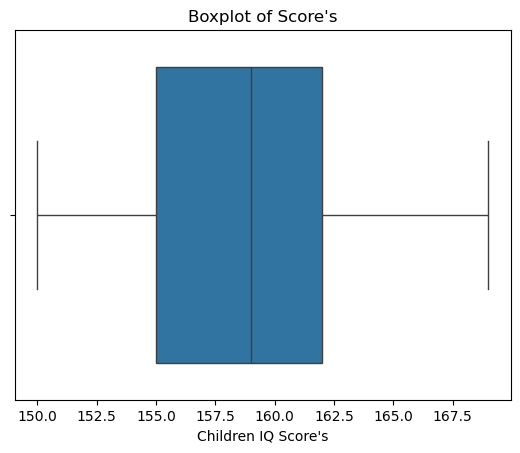

In [9]:
sns.boxplot(x=gifted.score)
plt.xlabel("Children IQ Score's")
plt.title("Boxplot of Score's")
plt.show()

#### It seems that there are no effect of the outliers present in the predictors on the target variable. So we will move on with the outliers.

#### Let's check out the correlation matrix to numerically check the relationship among the predictors and the target.

<Axes: >

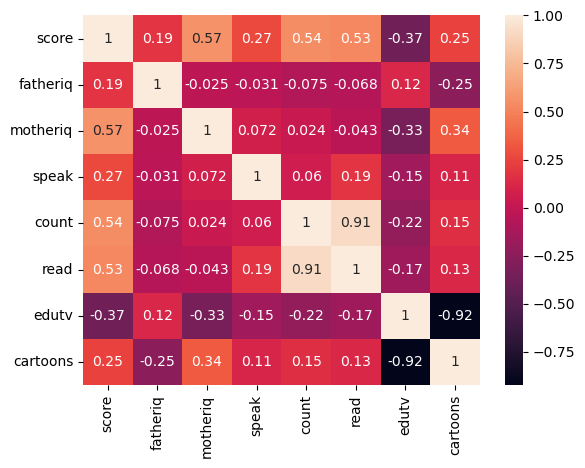

In [10]:
sns.heatmap(gifted.corr(),annot=True)

#### It seem's high IQ childrens are not that keen for television.

#### If speaking for multicollinearity, 'read' and 'count' are positively collinear among each other whereas the case is vice-versa for 'edutv' and 'cartoons'.

#### Now let's scale our data to prepare for modelling.

#### Using "Robust Scaler" (robust to outliers)

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
x=gifted.drop('score',axis='columns')
y=gifted['score']

In [13]:
rb_scaler=RobustScaler()
x_scaled=rb_scaler.fit_transform(x)

In [14]:
model_ols=sm.OLS.from_formula('y~x_scaled',data=gifted).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.97
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           5.80e-07
Time:                        00:02:29   Log-Likelihood:                -80.825
No. Observations:                  36   AIC:                             177.7
Df Residuals:                      28   BIC:                             190.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     159.7070      0.519    307.652      

#### 75% of the variation is explained by the predictors with the p-value being significant with "F-statistic: 11.97". The one-third i.e.,32% of the variance is explained by 'mom_iq', 29% by 'speak' and 28% by 'read'.

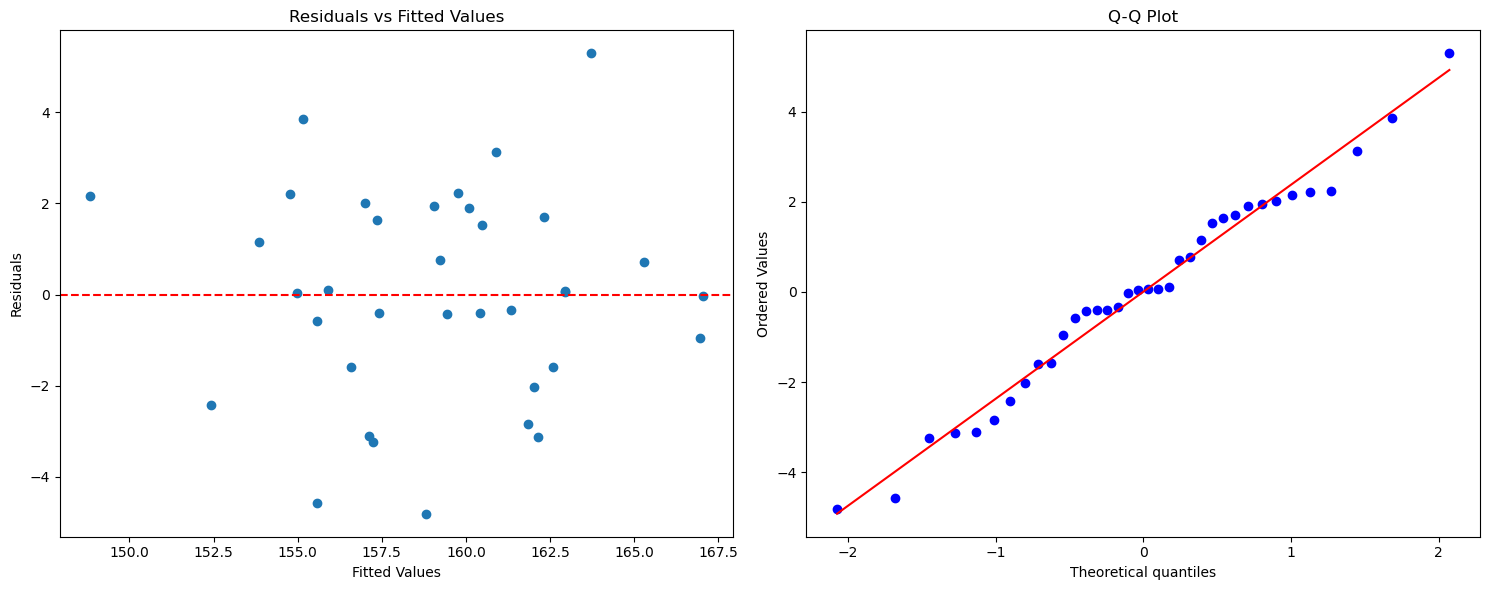

In [15]:
import scipy.stats as stats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(model_ols.fittedvalues, model_ols.resid)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted Values")
stats.probplot(model_ols.resid, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

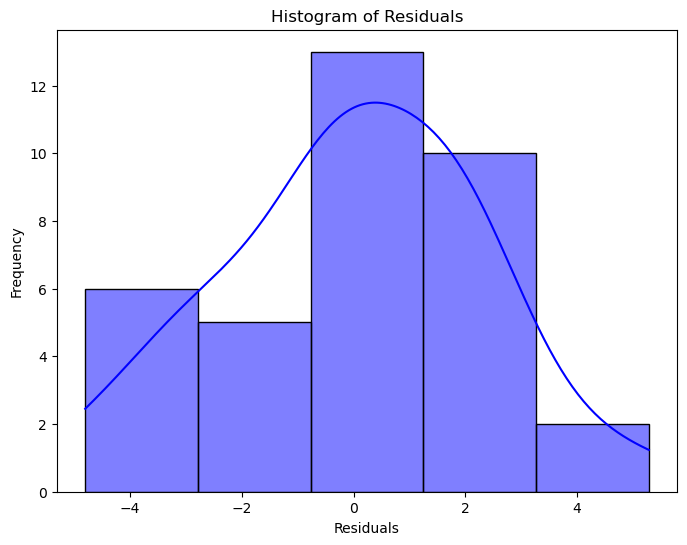

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(model_ols.resid, kde=True, bins=5, color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### All the assumptions of Linear Regression is followed.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'solver': ['auto', 'svd', 'cholesky']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['squared_error', 'absolute_error']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        },
        'svr': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf'],
                'C': [1, 10],
                'gamma': ['scale', 'auto']
            }
        },
        'kernel_ridge': {
            'model': KernelRidge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
            }
        },
        'mlp': {
            'model': MLPRegressor(max_iter=500),
            'params': {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh'],
                'solver': ['adam', 'sgd']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [18]:
result=find_best_model_using_gridsearchcv(x_scaled,y)

In [19]:
result

model  best_score  \
0  linear_regression    0.665095   
1              lasso    0.670405   
2              ridge    0.660044   
3      decision_tree    0.285817   
4      random_forest    0.505264   
5  gradient_boosting    0.386008   
6                svr    0.648095   
7       kernel_ridge    0.498681   
8                mlp    0.540726   

                                         best_params  
0                            {'fit_intercept': True}  
1                {'alpha': 1, 'selection': 'random'}  
2                     {'alpha': 10, 'solver': 'svd'}  
3  {'criterion': 'squared_error', 'splitter': 'be...  
4  {'criterion': 'squared_error', 'n_estimators':...  
5  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
6     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  
7                  {'alpha': 10, 'kernel': 'linear'}  
8  {'activation': 'relu', 'hidden_layer_sizes': (...

#### Now since we got the results, let's try out 2 models with the best scores.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=0,shuffle=True)

#### Lasso Regression

In [22]:
lasso=Lasso(alpha=1,selection='cyclic')
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [23]:
y_pred_lasso=lasso.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 12.62
Root Mean Squared Error (RMSE): 3.55
Mean Absolute Error (MAE): 2.77
R-squared (R²): 0.20


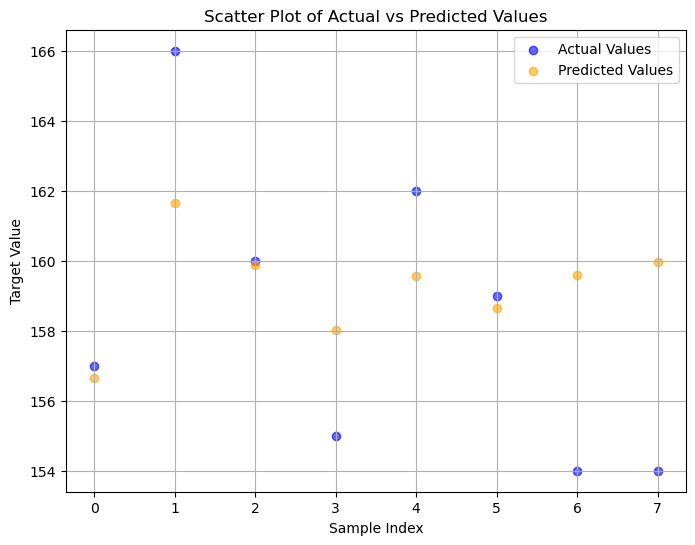

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Values')
plt.scatter(range(len(y_pred_lasso)), y_pred_lasso, color='orange', alpha=0.6, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#### Linear Regression

In [26]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred_lr=lr.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 11.04
Root Mean Squared Error (RMSE): 3.32
Mean Absolute Error (MAE): 2.76
R-squared (R²): 0.30


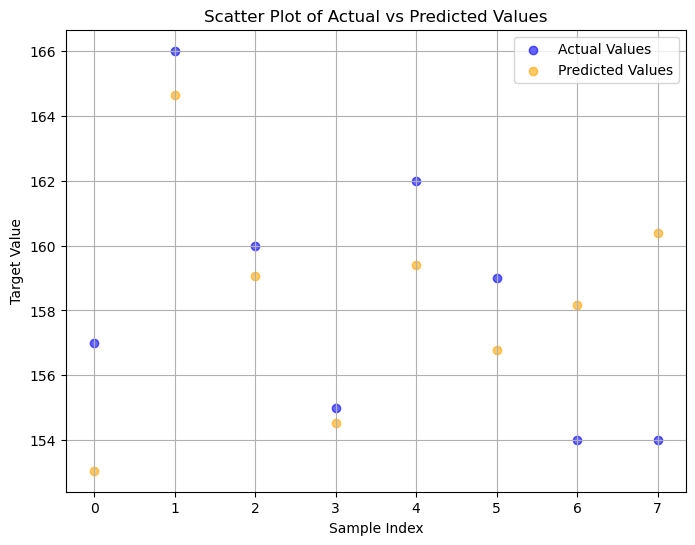

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual Values')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='orange', alpha=0.6, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#### Selected out the best 2 models from the Grid Search CV results and the Linear Regression has a slight lower MSE value than Lasso. If more, samples can be collected, I believe R² can be increased.